In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('C:\\Users\\al6436\\Desktop\\Ecommerce Customers')

print(df.head())
print(df.info())
print(df.describe())

X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Null Hypothesis (H0): There is no significant relationship between the independent variables and Yearly Amount Spent.
# Alternative Hypothesis (H1): At least one independent variable significantly impacts Yearly Amount Spent.

X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant).fit()
print(model.summary())

                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    

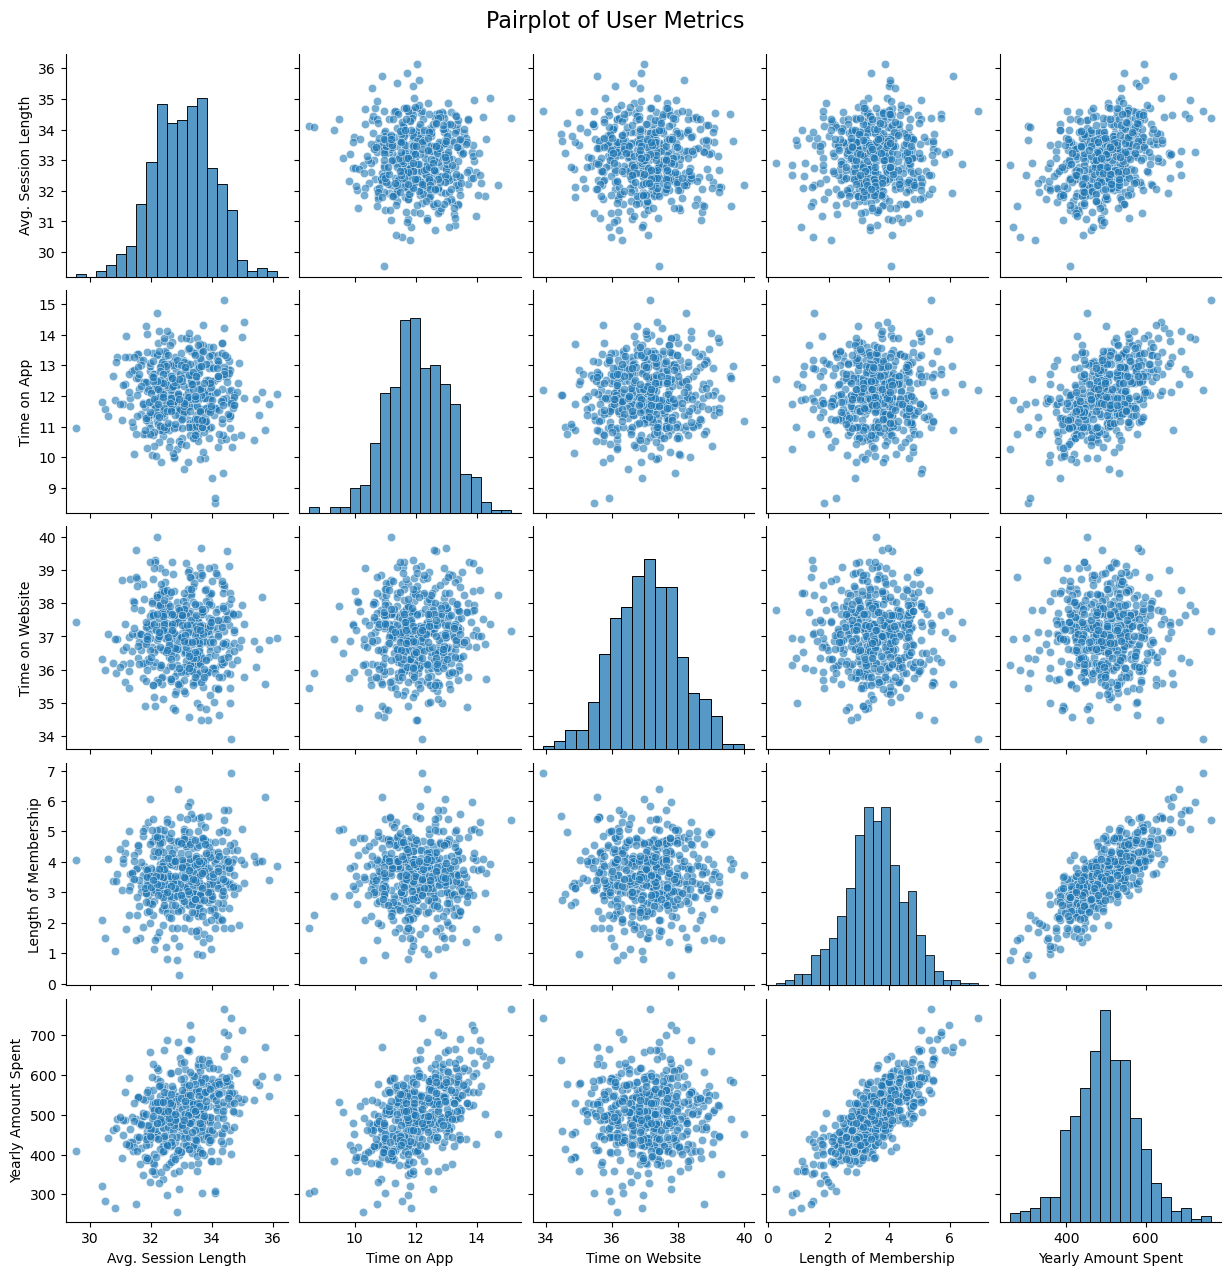

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numerical_cols = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

sns.pairplot(df[numerical_cols], kind='scatter', plot_kws={'alpha': 0.6})

plt.suptitle("Pairplot of User Metrics", size=16, y=1.02)

plt.show()


In [4]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression R^2:", r2_score(y_test, y_pred))
print("Linear Regression Coefficients:", pd.Series(lr.coef_, index=X.columns))

Linear Regression R^2: 0.9778130629184127
Linear Regression Coefficients: Avg. Session Length     25.596259
Time on App             38.785346
Time on Website          0.310386
Length of Membership    61.896829
dtype: float64


In [5]:
# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_lasso_pred = lasso.predict(X_test)
print("Lasso Regression R^2:", r2_score(y_test, y_lasso_pred))
print("Lasso Regression Coefficients:", pd.Series(lasso.coef_, index=X.columns))
n = X_test.shape[0]  
p = (lasso.coef_ != 0).sum()  
r2 = lasso.score(X_test, y_test)
print(r2)# Get R² score
r2_train = lasso.score(X_train,y_train)
print(r2_train)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R²:", adj_r2)
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train) 
X_test_sm = sm.add_constant(X_test)

lasso_ols = sm.OLS(y_train, X_train_sm).fit_regularized(alpha=0.1, L1_wt=1)
ols_results = sm.OLS(y_test, X_test_sm).fit()

print(ols_results.summary())
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_lasso_pred)
mse = mean_squared_error(y_test, y_lasso_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Lasso Regression R^2: 0.9776634203062273
Lasso Regression Coefficients: Avg. Session Length     24.573674
Time on App             37.824074
Time on Website          0.000000
Length of Membership    61.015647
dtype: float64
0.9776634203062273
0.9849710918319237
Adjusted R²: 0.976965402190797
                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.979
Model:                             OLS   Adj. R-squared:                  0.978
Method:                  Least Squares   F-statistic:                     1113.
Date:                 Thu, 06 Mar 2025   Prob (F-statistic):           7.48e-79
Time:                         11:50:23   Log-Likelihood:                -373.84
No. Observations:                  100   AIC:                             757.7
Df Residuals:                       95   BIC:                             770.7
Df Model:                            4                              

In [6]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge_pred = ridge.predict(X_test)
print("Ridge Regression R^2:", r2_score(y_test, y_ridge_pred))
print("Ridge Regression Coefficients:", pd.Series(ridge.coef_, index=X.columns))


Ridge Regression R^2: 0.9778955991604819
Ridge Regression Coefficients: Avg. Session Length     25.532937
Time on App             38.693756
Time on Website          0.311004
Length of Membership    61.756961
dtype: float64


In [7]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import jarque_bera

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# R-squared
r2_ridge = ridge.score(X_test, y_test)
r2_train_ridged = ridge.score(X_train,y_train)
print("R2 Train" ,r2_train_ridged)
# Adjusted R-squared
n, p = X_test.shape  
adj_r2_ridge = 1 - (1 - r2_ridge) * (n - 1) / (n - p - 1)

# Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Root Mean Squared Error (RMSE)
rmse_ridge = np.sqrt(mse_ridge)

# Durbin-Watson test (checks autocorrelation in residuals)
residuals = y_test - y_pred_ridge
dw_stat = sm.stats.durbin_watson(residuals)

# Jarque-Bera test for normality
jb_stat, jb_p_value = jarque_bera(residuals)

# Skewness & Kurtosis
skewness = residuals.skew()
kurtosis = residuals.kurtosis()

# F-statistic and Prob (F-statistic)
X_train_const = sm.add_constant(X_train)  
ridge_ols = sm.OLS(y_train, X_train_const).fit()
f_stat = ridge_ols.fvalue
f_p_value = ridge_ols.f_pvalue

# Print results
print(f"Ridge Regression R²: {r2_ridge}")
print(f"Adjusted R²: {adj_r2_ridge}")
print(f"F-statistic: {f_stat}")
print(f"Prob (F-statistic): {f_p_value}")
print(f"Durbin-Watson: {dw_stat}")
print(f"Jarque-Bera: {jb_stat}, p-value: {jb_p_value}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")
print(f"MAE: {mae_ridge}")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")


R2 Train 0.9854188156801806
Ridge Regression R²: 0.9778955991604819
Adjusted R²: 0.9769648875461864
F-statistic: 6676.1146139853145
Prob (F-statistic): 0.0
Durbin-Watson: 2.319871132059593
Jarque-Bera: 0.1124166383055441, p-value: 0.9453421824939894
Skewness: 0.07357976019317333
Kurtosis: 0.14377039293255578
MAE: 8.539230754571278
MSE: 109.45504392646647
RMSE: 10.462076463420944


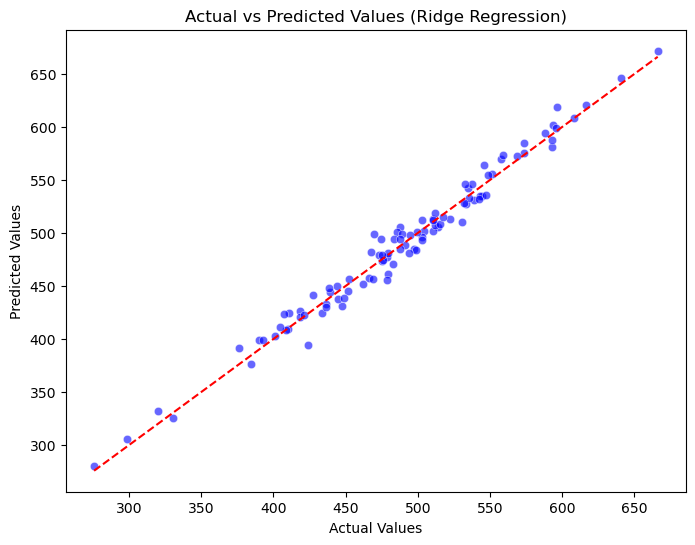

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_ridge, color="blue", alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--", color="red")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Ridge Regression)")
plt.show()

In [9]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(
    n_estimators=30, 
    max_depth=5,  
    min_samples_split=5,  
    min_samples_leaf=4,  
    max_features='sqrt',  
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_rf_pred_test = rf.predict(X_test)
y_rf_pred_train = rf.predict(X_train)

# R² Scores
print("Random Forest Regression R^2 (Test):", r2_score(y_test, y_rf_pred_test))
print("Random Forest Regression R^2 (Train):", r2_score(y_train, y_rf_pred_train))

Random Forest Regression R^2 (Test): 0.9005464755160318
Random Forest Regression R^2 (Train): 0.9283138053428115


In [10]:
import pandas as pd
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)


                Feature  Importance
3  Length of Membership    0.635432
1           Time on App    0.242113
0   Avg. Session Length    0.104173
2       Time on Website    0.018282


In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 396.43283728164835


In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": range(1, 30, 2)}  
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, y_train)
print("Best K:", grid_search.best_params_["n_neighbors"])



Best K: 3


In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print("R² Score (Test):", r2_score(y_test, y_pred))

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score (Test): 0.9270419516262814
MAE: 15.241018945768452
MSE: 396.43283728164835
RMSE: 19.91062121787385
